In [1]:
from dhlab import Corpus
from sentiment import coll_sentiment, sentiment_by_place
import pandas as pd


wordcloud er ikke installert, kan ikke lage ordskyer


In [2]:
res = sentiment_by_place()

In [3]:
l = list(res)

In [4]:
l[0]

,positive,negative,sum
1999,47,54,-7
2000,80,87,-7
2001,127,103,24
2002,170,160,10
2003,111,102,9
2004,118,121,-3
2005,54,55,-1
2006,76,109,-33
2007,43,74,-31
2008,86,104,-18


In [5]:
l[1]

,positive,negative,sum
1999,168,200,-32
2000,101,119,-18
2001,162,142,20
2002,263,258,5
2003,253,193,60
2004,217,198,19
2005,142,188,-46
2006,143,163,-20
2007,189,219,-30
2008,118,107,11


<AxesSubplot: >

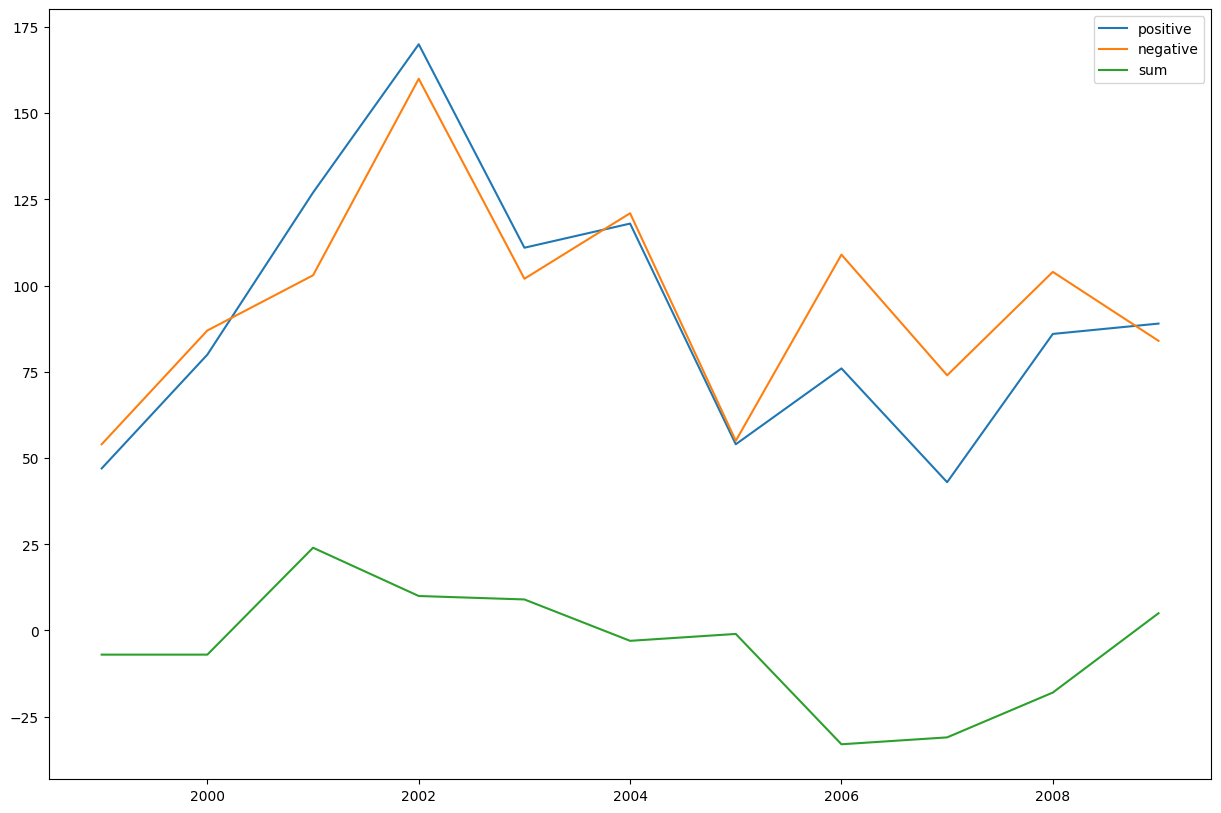

In [8]:
l[0].plot()

<AxesSubplot: >

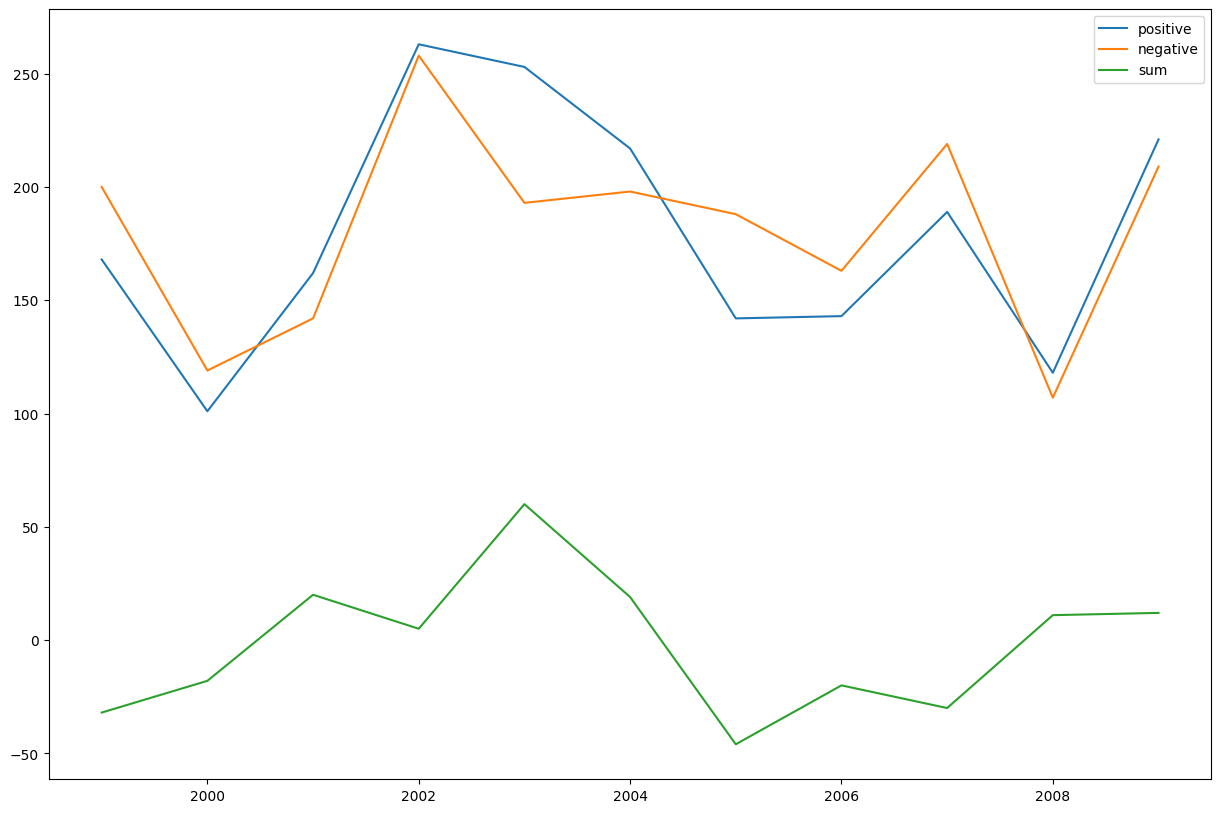

In [9]:
l[1].plot()

In [6]:
for x in res:
    x.plot()

In [ ]:
from dhlab.api.dhlab_api import document_corpus

In [8]:
trondheim2001 = Corpus(doctype="digavis", freetext="city: Harstad year: 2001", limit=1000)

In [9]:
trondheim2001

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype
0,200769799,URN:NBN:no-nb_digavis_harstadtidende_null_null...,harstadtidende,None,None,None,None,Harstad,20011207,2001,None,None,None,None,None,None,digavis
1,200769673,URN:NBN:no-nb_digavis_harstadtidende_null_null...,harstadtidende,None,None,None,None,Harstad,20010713,2001,None,None,None,None,None,None,digavis
2,200769686,URN:NBN:no-nb_digavis_harstadtidende_null_null...,harstadtidende,None,None,None,None,Harstad,20010728,2001,None,None,None,None,None,None,digavis
3,200769786,URN:NBN:no-nb_digavis_harstadtidende_null_null...,harstadtidende,None,None,None,None,Harstad,20011122,2001,None,None,None,None,None,None,digavis
4,200553600,URN:NBN:no-nb_digavis_fiskeribladet_null_null_...,fiskeribladet,None,None,None,None,Harstad,20011009,2001,None,None,None,None,None,None,digavis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,200769785,URN:NBN:no-nb_digavis_harstadtidende_null_null...,harstadtidende,None,None,None,None,Harstad,20011121,2001,None,None,None,None,None,None,digavis
398,200553526,URN:NBN:no-nb_digavis_fiskeribladet_null_null_...,fiskeribladet,None,None,None,None,Harstad,20010116,2001,None,None,None,None,None,None,digavis
399,200769794,URN:NBN:no-nb_digavis_harstadtidende_null_null...,harstadtidende,None,None,None,None,Harstad,20011201,2001,None,None,None,None,None,None,digavis
400,200769741,URN:NBN:no-nb_digavis_harstadtidende_null_null...,harstadtidende,None,None,None,None,Harstad,20011001,2001,None,None,None,None,None,None,digavis


In [3]:
type(trondheim2001)

dhlab.text.corpus.Corpus

In [4]:
coll = trondheim2001
word = "barnevern"

In [5]:
coll_sentiment(trondheim2001, "barnevern", return_score_only=True)

(143, 168)

In [10]:
my_range = range(2000, 2010)

In [53]:
df = pd.DataFrame(columns=["positive", "negative"])

lst = []
for year in my_range:
    corpus = Corpus(doctype="digavis", freetext=f"city: Kristiansand year: {year}", limit=1000)
    pos, neg = coll_sentiment(corpus, "barnevern", return_score_only=True)
    
    lst.append(
        pd.DataFrame(
            [[pos, neg]], 
            index=[year], 
            columns=["positive", "negative"]
            )
        )
  
df = pd.concat(lst)   

In [61]:
df["difference"] = df.positive - df.negative

<AxesSubplot: xlabel='years', ylabel='score'>

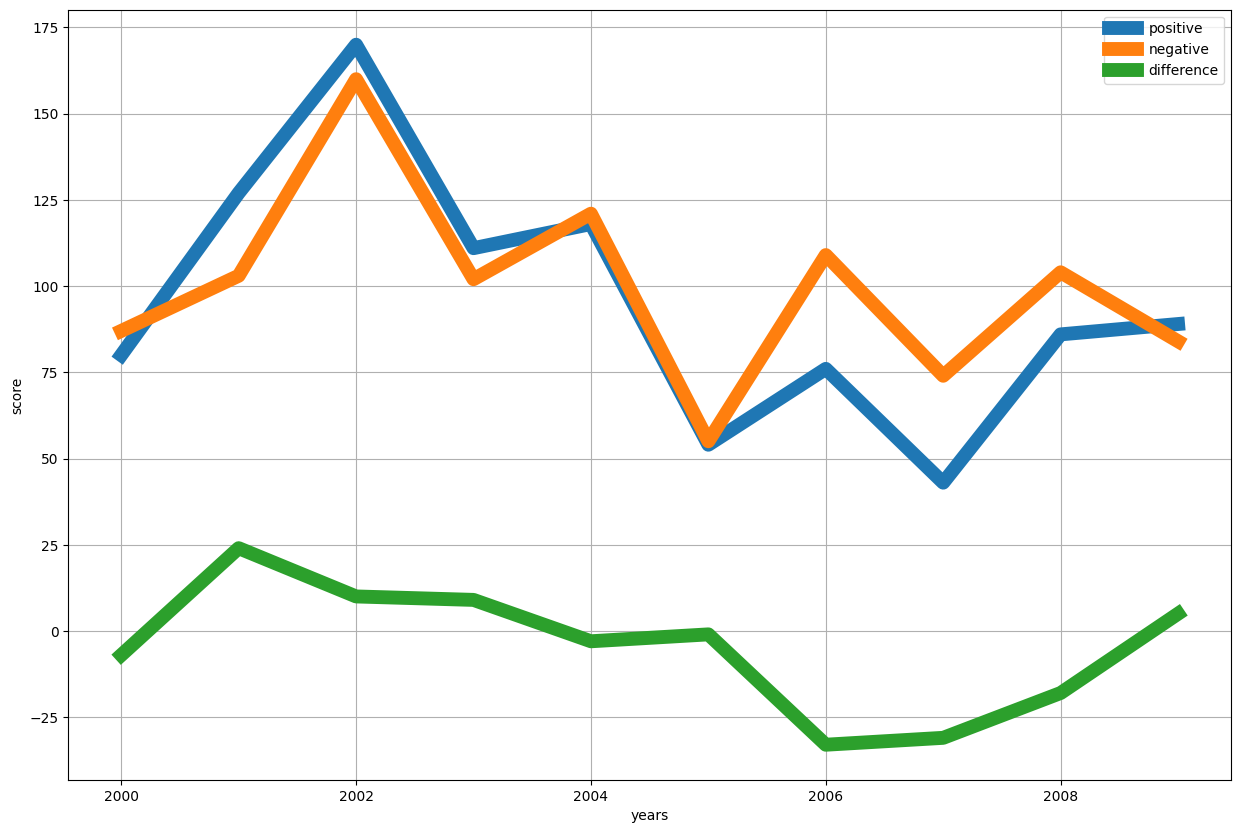

In [75]:
df.plot(xlabel="years", ylabel="score", fontsize=10, linewidth=10, grid=True)

In [40]:
dct = {
        year : {
            "positive" : pos,        
            "negative" : neg
            }
        }

In [44]:
pd.DataFrame([[pos, neg]], index=[year], columns=["positive", "negative"])

,positive,negative
2009,89,84


In [37]:
lst

[{2000: {'positive': 80, 'negative': 87}},
 {2001: {'positive': 127, 'negative': 103}},
 {2002: {'positive': 170, 'negative': 160}},
 {2003: {'positive': 111, 'negative': 102}},
 {2004: {'positive': 118, 'negative': 121}},
 {2005: {'positive': 54, 'negative': 55}},
 {2006: {'positive': 76, 'negative': 109}},
 {2007: {'positive': 43, 'negative': 74}},
 {2008: {'positive': 86, 'negative': 104}},
 {2009: {'positive': 89, 'negative': 84}}]

In [ ]:
  dct = {
        "positive" : {
             year : pos
        },
        
            "negative" : {
                year : neg
            }
        
    }

In [39]:
pd.DataFrame(lst)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,"{'positive': 80, 'negative': 87}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"{'positive': 127, 'negative': 103}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"{'positive': 170, 'negative': 160}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,"{'positive': 111, 'negative': 102}",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,"{'positive': 118, 'negative': 121}",NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,"{'positive': 54, 'negative': 55}",NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,"{'positive': 76, 'negative': 109}",NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'positive': 43, 'negative': 74}",NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'positive': 86, 'negative': 104}",NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'positive': 89, 'negative': 84}"
